In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('archive/1429_1.csv')
print(data.shape)
print(data.dtypes)
data.head(4)

(34660, 21)
id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
dtype: object


C:\Users\lukas\AppData\Local\Temp\ipykernel_64232\1162676513.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('archive/1429_1.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks


In [3]:
useful_data = data[['id', 'reviews.rating', 'reviews.text', 'reviews.title']]
useful_data.head()

,id,reviews.rating,reviews.text,reviews.title
0,AVqkIhwDv8e3D1O-lebb,5.0,This product so far has not disappointed. My c...,Kindle
1,AVqkIhwDv8e3D1O-lebb,5.0,great for beginner or experienced person. Boug...,very fast
2,AVqkIhwDv8e3D1O-lebb,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,AVqkIhwDv8e3D1O-lebb,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,AVqkIhwDv8e3D1O-lebb,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [4]:
# removing rows with Null values
useful_data['reviews.rating'].isnull().sum()
data = useful_data.dropna(axis=0, how='any', subset=['reviews.rating', 'reviews.text', 'reviews.title'])
data = data.rename(columns={'reviews.rating': 'rating', 'reviews.text': 'text', 'reviews.title': 'title'})
data.shape

(34621, 4)

<AxesSubplot:xlabel='rating'>

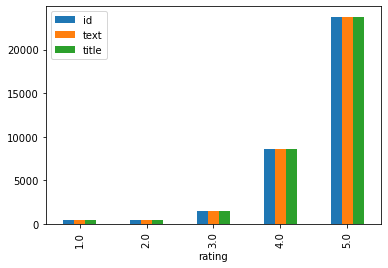

In [5]:
# showing the distribution of ratings

%matplotlib inline
data.groupby('rating').count().plot(kind='bar')

The task is to take the rating as a label and try to predict the label based on the text of a review.

## Features

To determine the features of each sample, we parse each text of a review

In [6]:
import nltk
import re
from collections import defaultdict
regex = re.compile("[^a-zA-Z']")
from nltk.corpus import stopwords

regex.sub('', "you'r00..##!e")



"you're"

In [7]:
word_dict ={}

In [8]:
def text_to_tokens(text: str):
    tokens = []

    for word in text.split():
        clean_word = regex.sub('', word.lower())
        if clean_word not in stopwords.words('english') and len(clean_word) > 1:
            tokens.append(clean_word)
            if clean_word not in word_dict:
                word_dict[clean_word] = 0
            word_dict[clean_word] += 1


    return tokens


In [9]:
text_to_tokens("I've had my Fire HD 8 two weeks now and I love it!!!!! :D")

["i've", 'fire', 'hd', 'two', 'weeks', 'love']

In [10]:
import pickle

In [11]:
# took 4min 30s

# data['tokens'] = data.text.apply(text_to_tokens)


In [12]:

# with open('data.pandas', 'wb') as data_file:
#     pickle.dump(data, data_file)

# with open('words.dict', 'wb') as data_file:
#     pickle.dump(word_dict, data_file)

In [13]:
with open('data.pandas', 'rb') as data_file:
    data = pickle.load( data_file)

with open('wordscopy.dict', 'rb') as data_file:
    word_dict = pickle.load(data_file)

In [14]:
data.shape

(34621, 5)

In [15]:
data.head(8)

,id,rating,text,title,tokens
0,AVqkIhwDv8e3D1O-lebb,5.0,This product so far has not disappointed. My c...,Kindle,"[product, far, disappointed, children, love, u..."
1,AVqkIhwDv8e3D1O-lebb,5.0,great for beginner or experienced person. Boug...,very fast,"[great, beginner, experienced, person, bought,..."
2,AVqkIhwDv8e3D1O-lebb,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,"[inexpensive, tablet, use, learn, step, nabi, ..."
3,AVqkIhwDv8e3D1O-lebb,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,"[i've, fire, hd, two, weeks, love, tablet, gre..."
4,AVqkIhwDv8e3D1O-lebb,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,"[bought, grand, daughter, comes, visit, set, u..."
5,AVqkIhwDv8e3D1O-lebb,5.0,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,"[amazon, fire, inch, tablet, perfect, size, pu..."
6,AVqkIhwDv8e3D1O-lebb,4.0,"Great for e-reading on the go, nice and light ...",great e-reader tablet,"[great, ereading, go, nice, light, weight, pri..."
7,AVqkIhwDv8e3D1O-lebb,5.0,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,"[gave, christmas, gift, inlaws, husband, uncle..."


Now we examine the data collected in the dictionary

In [16]:
print(len(word_dict.keys()))

word_dict = dict(filter(lambda x: x[1] > 5, word_dict.items()))

len(word_dict)


17822


4029

We are left with over `4000` words;

Now we will transform the list of tokens to the vector of occurrences of each word in each review.

In [17]:
word_position_dict = {}
for i, key in enumerate(word_dict.keys()):
    word_position_dict[key] = i

In [18]:
s = len(word_dict.keys())

def tokens_to_vector(words: list):
    v = np.zeros(s, dtype = int)
    for word in words:
        try:
            v[word_position_dict[word]] += 1
        except KeyError:
            continue
    if type(v) != np.ndarray:
        raise RuntimeError("wtf")
    return v[np.newaxis]

In [19]:
data['word_count'] = data.tokens.apply(tokens_to_vector)



In [20]:
#data.rating = data.rating.astype(int)

## Data resampling

We have way more ratings with `5.0` than any other class.

We repeat the records with labels `1.0`, `2.0` and `3.0` 15 times.

Dataset will be more balanced but prone to overfitting since there are many samples repeated.

In [21]:
one_filter = data.rating == 1.0
two_filter = data.rating == 2.0
three_filter = data.rating == 3.0

one_df = data[one_filter]
two_df = data[two_filter]
three_df = data[three_filter]


one_df = pd.DataFrame(np.repeat(one_df.values, 14, axis=0), columns = one_df.columns)
two_df = pd.DataFrame(np.repeat(two_df.values, 14, axis=0), columns = two_df.columns)
three_df = pd.DataFrame(np.repeat(three_df.values, 7, axis=0), columns = three_df.columns)

data = pd.concat([data, one_df, two_df, three_df])


<AxesSubplot:xlabel='rating'>

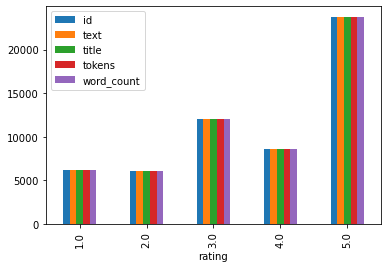

In [22]:
# showing the distribution of ratings after resampling

%matplotlib inline
data.groupby('rating').count().plot(kind='bar')

In [23]:
list(data.word_count)

[array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[1, 2, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 1, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 1, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..

## Naive Bayes Classification

In [30]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [50]:

clf = MultinomialNB()

clf.fit(X_train, Y_train.astype(float))

predictions = clf.predict(X_test.astype(float))



In [52]:
metrics.confusion_matrix(Y_test.astype(float), predictions)

array([[1532,   93,  245,   18,  145],
       [ 126, 1334,  309,   40,  177],
       [ 203,  160, 2639,  229,  754],
       [  66,   73,  532,  602, 1628],
       [ 117,   89,  402,  545, 6582]], dtype=int64)

In [54]:
metrics.accuracy_score(Y_test.astype(float), predictions)

0.6807403433476394

Simple classifier was able to correctly reclassify almost 70% of reviews. 